#Decision Trees
1. Implentation of the base model of Decision Trees on IRIS data
2. Gini impurity calculation
3. CART algorithm implementation

#Ensemble methods


#Random Forest

#Decision Tree
#1. Base model implementation

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
# Create and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy and print the classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        29
  versicolor       0.92      1.00      0.96        23
   virginica       1.00      0.91      0.95        23

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75



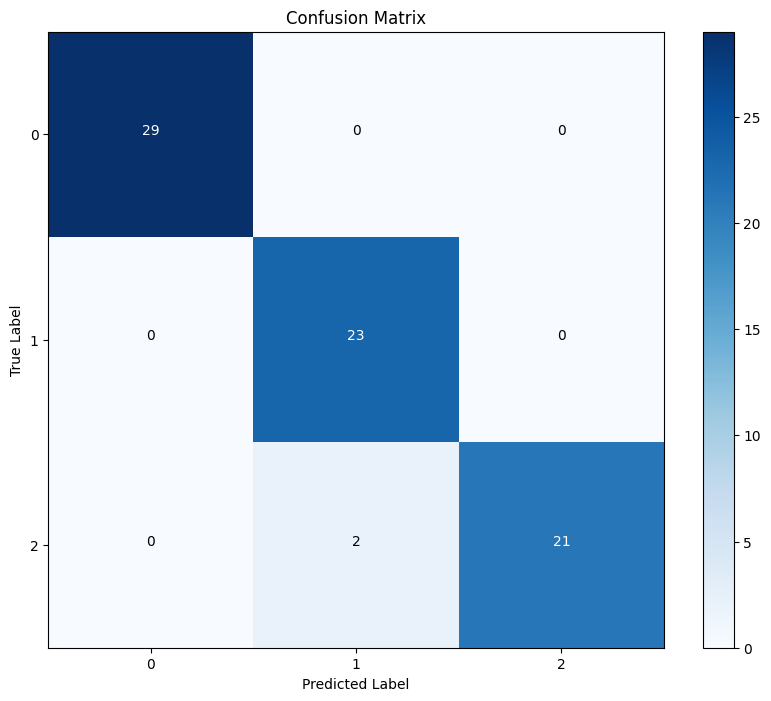

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Create the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, np.arange(3))
plt.yticks(tick_marks, np.arange(3))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Add values to the cells
for i in range(3):
    for j in range(3):
        plt.text(j, i, str(confusion_mat[i, j]), horizontalalignment="center", color="white" if i == j else "black")

plt.show()

#2. Gini Impurity calculation
Gini impurity is a measure of impurity or uncertainty in a dataset. In the context of decision trees and classification problems, Gini impurity is used as a criterion to evaluate the quality of a split, i.e., how well a particular feature divides the data into different classes. It helps in deciding which feature to choose for splitting a node in a decision tree.


*   Gini impurity = 0 indicates that the node is pure, i.e., all samples belong to the same class.
*   Gini impurity = 0.5 indicates that the node is equally distributed, i.e., samples are evenly split between the classes.



In [ ]:
def calculate_gini(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    total_samples = len(labels)
    gini_impurity = 1.0

    for count in counts:
        probability = count / total_samples
        gini_impurity -= probability ** 2

    return gini_impurity

gini_impurity = calculate_gini(y)
print(gini_impurity)

0.6666666666666665


### entropy of the Iris dataset:- a measure of disorder.

In [ ]:
from scipy.stats import entropy

# Calculate the entropy for the entire dataset
dataset_entropy = entropy(np.bincount(y), base=2)
print(f"Entropy for the Iris dataset: {dataset_entropy:.2f}")

Entropy for the Iris dataset: 1.58


### Information Gain :- measure the effectiveness of a feature in classifying or partitioning the data.
high information gain - suppose the feature "A" is more informative and has a stronger ability to distinguish between different classes.


In [ ]:

from sklearn.feature_selection import mutual_info_classif



# Calculate the information gain for the petal length feature
petal_length_feature_index = 2  # Index of the petal length feature in the feature matrix X

information_gains_petal_length = mutual_info_classif(X[:, petal_length_feature_index].reshape(-1, 1), y)

print(f"Information Gain for petal length feature: {information_gains_petal_length[0]:.4f}")


IndexError: ignored

## comparison between decisiontree classifier and svm classifier using "linear kernel function".

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# SVM Classifier
svm_classifier = SVC(kernel='linear', C=0.2, random_state=42)
svm_classifier.fit(X_train, y_train)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_classifier.predict(X_test)
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the models
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)

classification_report_svm = classification_report(y_test, y_pred_svm)
classification_report_dt = classification_report(y_test, y_pred_dt)

print("SVM Classifier:")
print(f"Accuracy: {accuracy_svm:.2f}")
print("Confusion Matrix:")
print(confusion_matrix_svm)
print("Classification Report:")
print(classification_report_svm)

print("\nDecision Tree Classifier:")
print(f"Accuracy: {accuracy_dt:.2f}")
print("Confusion Matrix:")
print(confusion_matrix_dt)
print("Classification Report:")
print(classification_report_dt)


SVM Classifier:
Accuracy: 0.99
Confusion Matrix:
[[29  0  0]
 [ 0 23  0]
 [ 0  1 22]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.96      1.00      0.98        23
           2       1.00      0.96      0.98        23

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75


Decision Tree Classifier:
Accuracy: 0.91
Confusion Matrix:
[[29  0  0]
 [ 0 20  3]
 [ 0  4 19]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.83      0.87      0.85        23
           2       0.86      0.83      0.84        23

    accuracy                           0.91        75
   macro avg       0.90      0.90      0.90        75
weighted avg       0.91      0.91      0.91        75



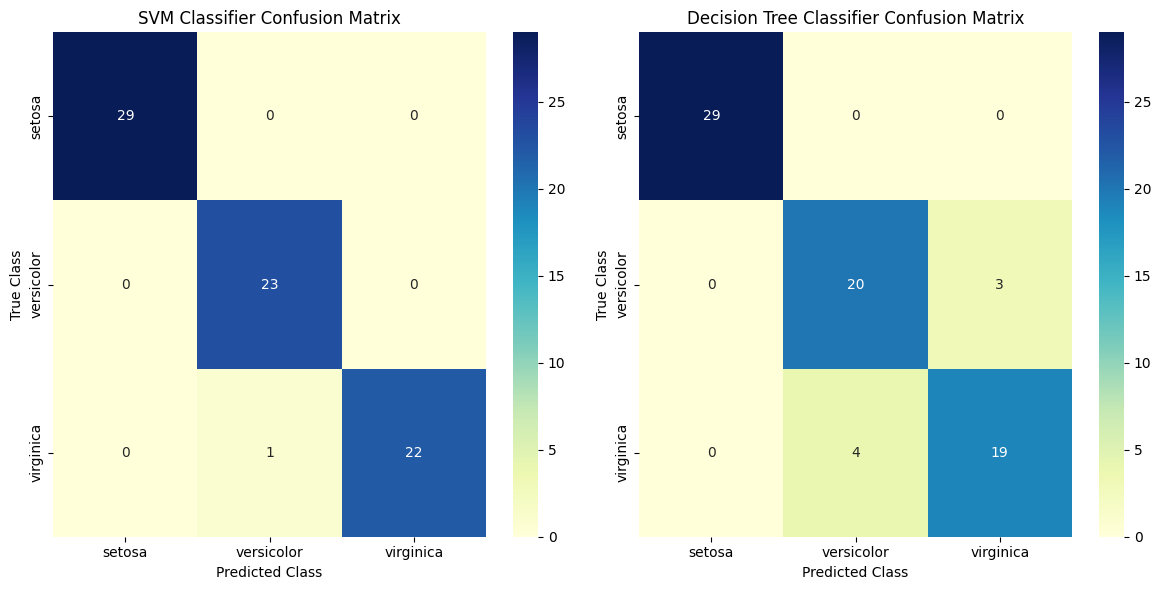

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Create label encoder to map class names to integers for heatmap display
class_names = iris.target_names
le = LabelEncoder()
le.fit(class_names)
class_names_encoded = le.transform(class_names)

# Create heatmaps
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix_svm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=class_names, yticklabels=class_names)
plt.title("SVM Classifier Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix_dt, annot=True, fmt="d", cmap="YlGnBu", xticklabels=class_names, yticklabels=class_names)
plt.title("Decision Tree Classifier Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

plt.tight_layout()
plt.show()